<a href="https://colab.research.google.com/github/flash-berry/MachineLearning/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В лабораторной работе выполнены все основные и дополнительные пункты:

 * Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
 * Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти тут.
 * Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
 * Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
 * При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
 * Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
 * Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
 * Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
 * (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
 * (+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

Возьмём разведочный анализ для датасета heart.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


age - возраст в годах

sex - (1 = мужчина; 0 = женщина)

cp - тип боли в груди

trestbps - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)

chol - холестерин сыворотки в мг/дл

fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = правда; 0 = ложь)

restecg - результаты электрокардиографии в состоянии покоя

thalach - максимальная частота сердечных сокращений достигнута

exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

oldpeak - Депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

slope - наклон пиковой нагрузки сегмента ST

ca - количество крупных сосудов (0-3), окрашенных флюороскопией

thal - 3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект

target - have disease or not (1=yes, 0=no)




---


**Необходимо решить задачу классификации и научиться предсказывать целовой признак target имеет ли пациент заболевание сердца.**

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
df.target.value_counts()

,count
target,
1,164
0,138


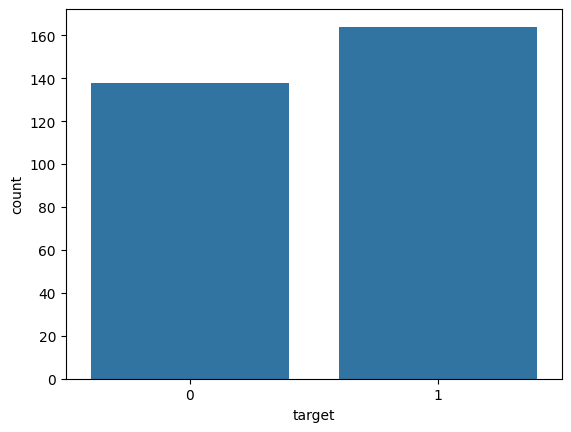

In [ ]:
sns.countplot(x="target", data=df)
plt.show()

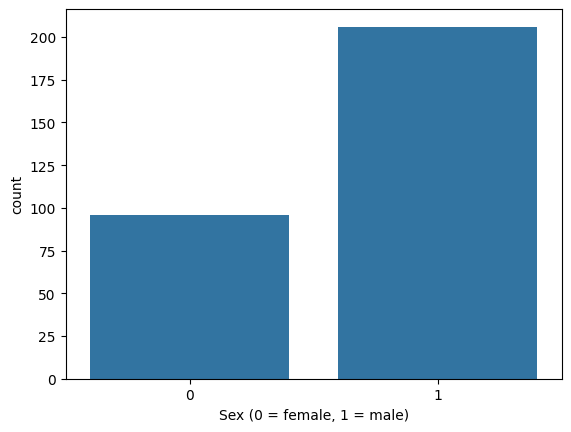

In [ ]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


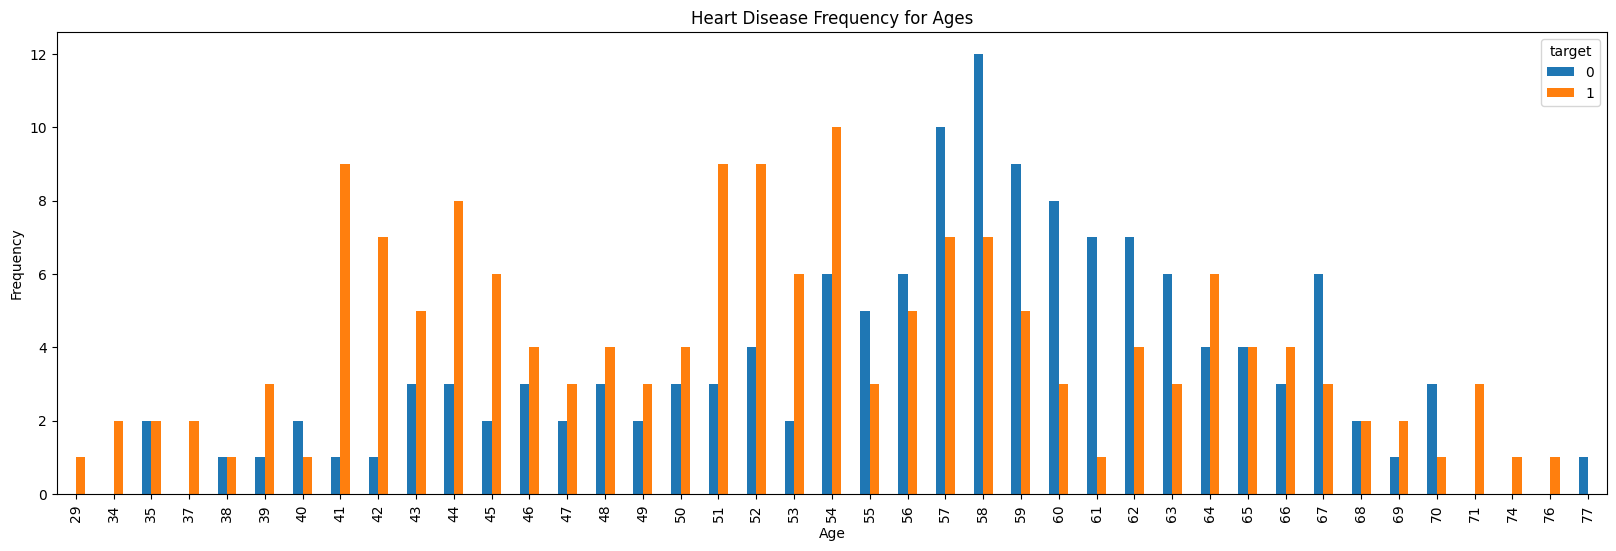

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

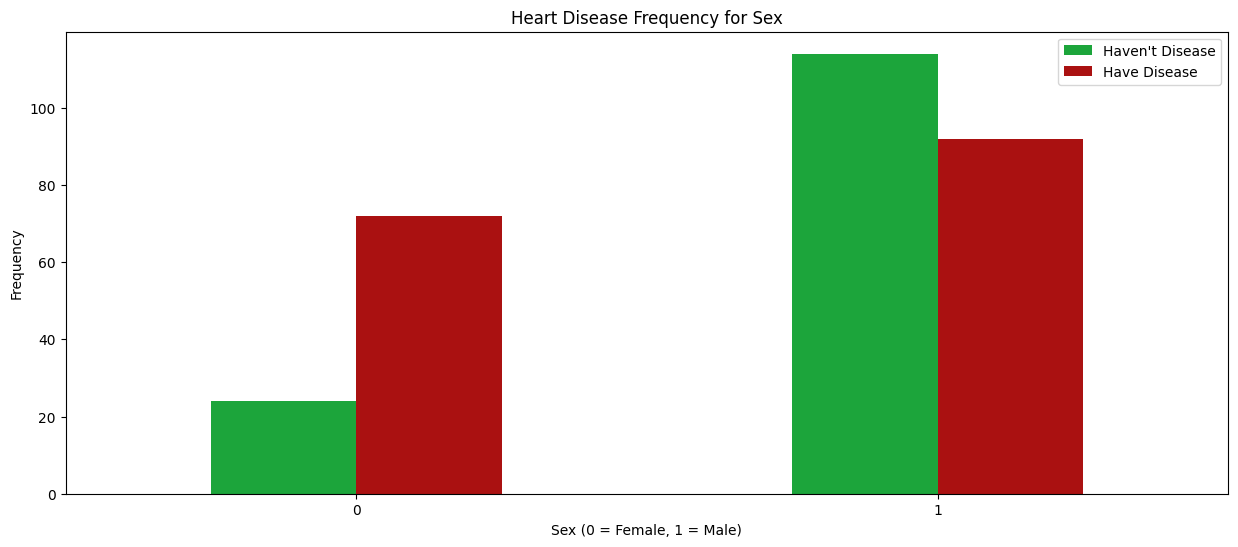

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

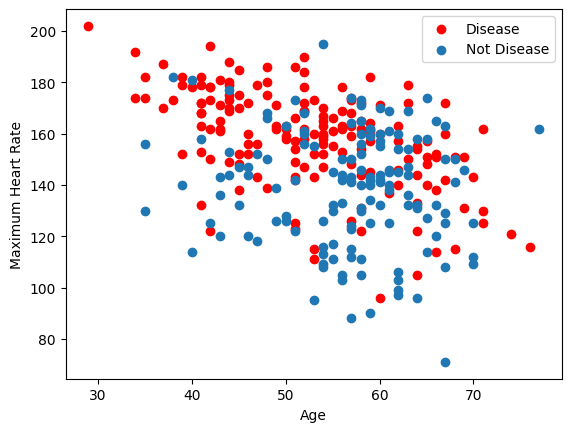

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

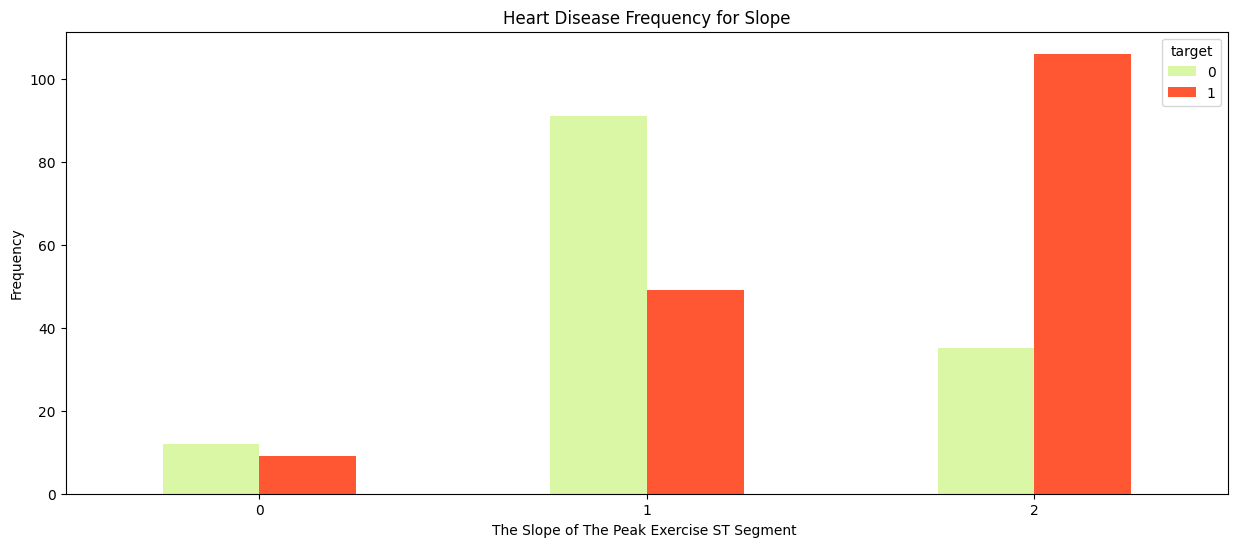

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

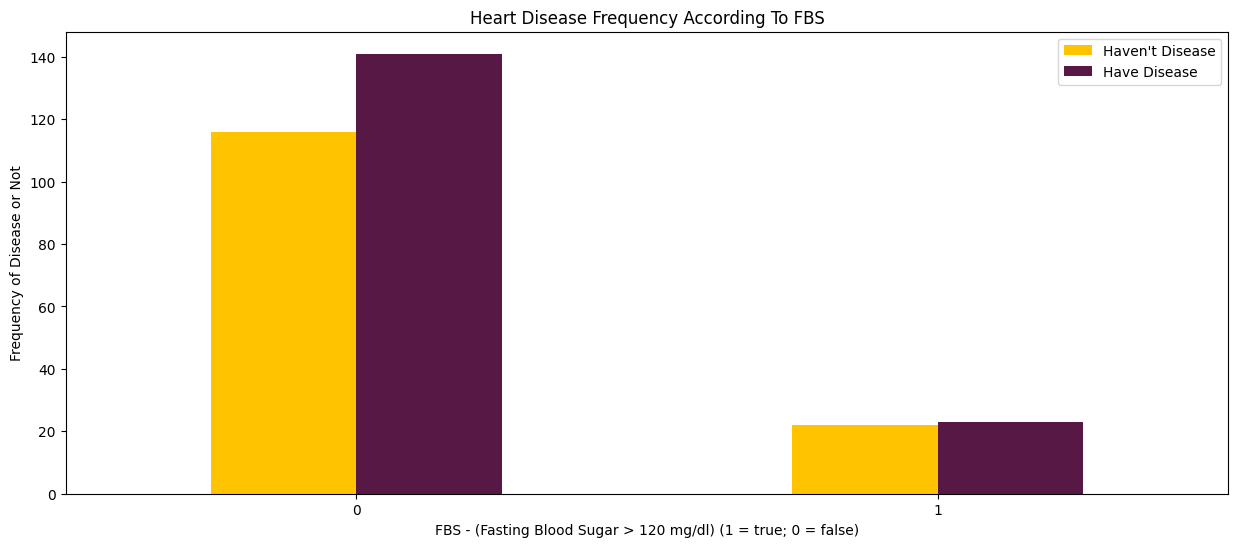

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

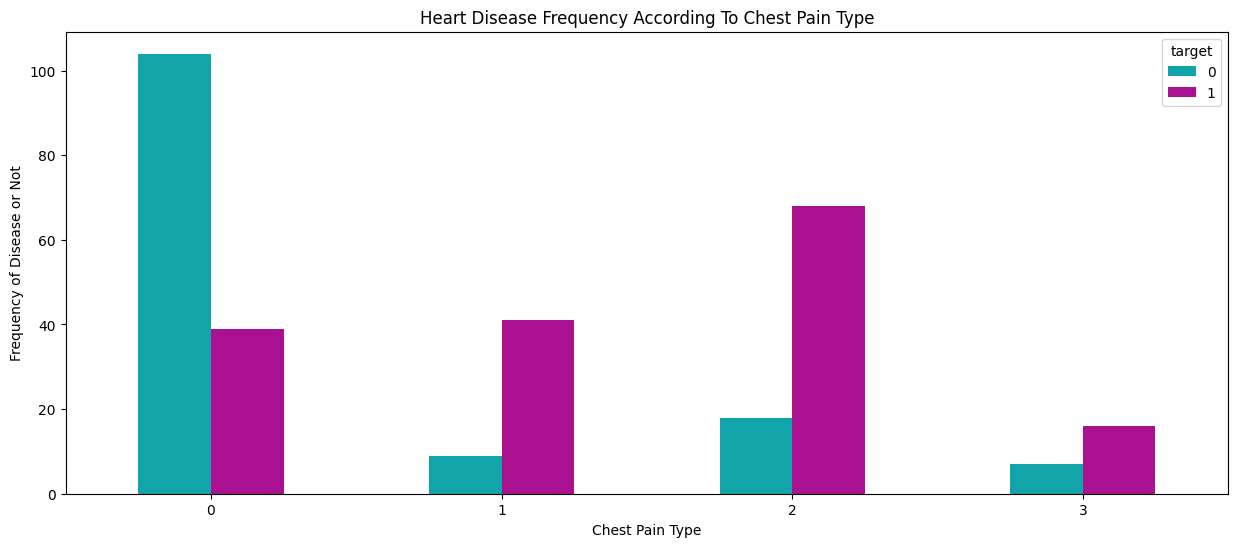

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

**Преобразование категориальных признаков**

Закодируем категориальные признаки cp, thal и slope.

In [ ]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp", dtype = int)
thal_dum = pd.get_dummies(df['thal'], prefix = "thal", dtype = int)
slope_dum = pd.get_dummies(df['slope'], prefix = "slope", dtype = int)

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope', 'cp_0', 'thal_0', 'slope_0'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,0,0,0,0,0,1,0,1
1,53,1,140,203,1,0,155,1,3.1,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,0,0,0,0,0,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0,0,0,0,0,0,1,0,1
4,62,0,138,294,1,1,106,0,1.9,3,0,0,0,0,0,1,0,1,0


**Разбиение данных с использованием train_test_split**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

# словарь для сохранения точности предсказаний
model_accuracies = {}

Используем библиотечные модели, обучим их и подберём для них гиперпараметры.

Добавим результаты их предсказаний в словарь, чтобы в конце сравнить их между собой и сделать выводы

---

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

C = np.arange(1e-05, 2, 0.1)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

log_reg = LogisticRegression(random_state=11)

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
model_accuracies['Logistic Regression'] = log_clf.score(X_test, y_test)
print("test score:", model_accuracies['Logistic Regression'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.10001, random_state=11))])
best params: {'clf__C': 0.10001}
best score: 0.8342857142857143
test score: 0.8351648351648352


**K-Nearest Neighbour (KNN) Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 11, 2)
weights = ['uniform', 'distance']

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

knn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
model_accuracies['KNN'] = knn_clf.score(X_test, y_test)
print("test score:", model_accuracies['KNN'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=9))])
best params: {'clf__n_neighbors': 9, 'clf__weights': 'uniform'}
best score: 0.8388482834994463
test score: 0.8241758241758241


**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(5)

svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv,
        param_grid=dict(kernel=kernel,C=C, gamma=gamma),refit='Accuracy')

grid_svm.fit(X_train_scaled, y_train)

print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
model_accuracies['SVM'] = grid_svm.score(X_test_scaled, y_test)
print("test score:", model_accuracies['SVM'])

best score:  0.843078626799557
best param:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
test score: 0.8021978021978022


**Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(nb_clf.best_estimator_))
print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
model_accuracies['Naive Bayes'] = nb_clf.score(X_test, y_test)
print("test score:", model_accuracies['Naive Bayes'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', GaussianNB(var_smoothing=0.12328467394420659))])
best params: {'clf__priors': None, 'clf__var_smoothing': 0.12328467394420659}
best score: 0.8539977851605758
test score: 0.8351648351648352


**Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
max_features = [2, 4, 6, 8]

cv = StratifiedKFold(5)

decision_tree = DecisionTreeClassifier(random_state=81)
grid_dt = GridSearchCV(estimator=decision_tree, cv=cv,
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features), refit='Accuracy')

grid_dt.fit(X_train, y_train)

print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
model_accuracies['Decision Tree'] = grid_dt.score(X_test, y_test)
print("test score:", model_accuracies['Decision Tree'])

best score:  0.8384274640088594
best param:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}
test score: 0.6263736263736264


**Самостоятельно реализуем метод классификации MyKNN**


---

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.stats import mode


class MyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5, weights='uniform', distances='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distances = distances

    def fit(self, X, y):
        self.X_ = np.array(X)
        self.y_ = np.array(y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        X = np.array(X)
        distances = self.compute_distances(X)

        neighbor_indices = np.argsort(distances)[:, :self.n_neighbors]
        neighbor_labels = self.y_[neighbor_indices]

        if self.weights == 'uniform':
            return mode(neighbor_labels, axis=1).mode.ravel()
        elif self.weights == 'distance':
            neighbor_distances = np.take_along_axis(distances, neighbor_indices, axis=1)
            weighted_votes = np.zeros((X.shape[0], len(self.classes_)))
            for i in range(self.n_neighbors):
                weights = 1 / (neighbor_distances[:, i] + 1e-5)
                for j, label in enumerate(neighbor_labels[:, i]):
                    label_index = np.where(self.classes_ == label)[0][0]
                    weighted_votes[j, label_index] += weights[j]
            return self.classes_[weighted_votes.argmax(axis=1)]

    def compute_distances(self, X):
        if self.distances == 'euclidean':
            dist = np.sqrt(((self.X_ - X[:, np.newaxis]) ** 2).sum(axis=2))
        elif self.distances == 'manhattan':
            dist = np.abs(self.X_ - X[:, np.newaxis]).sum(axis=2)
        elif self.distances == 'chebyshev':
            dist = np.abs(self.X_ - X[:, np.newaxis]).max(axis=2)
        return dist

    def score(self, X, y):
        return np.mean(self.predict(X) == y)


In [ ]:
n_neighbors = np.arange(1, 11, 2)
weights = ['uniform', 'distance']
distances = ['euclidean', 'manhattan', 'chebyshev']

scoring = {'Accuracy': 'accuracy'}

myknn = MyKNN()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

myknn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',myknn)])

myknn_clf = GridSearchCV(estimator=myknn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights, clf__distances=distances), refit='Accuracy')

myknn_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(myknn_clf.best_estimator_))
print("best params: " + str(myknn_clf.best_params_))
print('best score:', myknn_clf.best_score_)
model_accuracies['MyKNN'] = myknn_clf.score(X_test, y_test)
print("test score:", model_accuracies['MyKNN'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()), ('clf', MyKNN(n_neighbors=9))])
best params: {'clf__distances': 'euclidean', 'clf__n_neighbors': 9, 'clf__weights': 'uniform'}
best score: 0.8388482834994463
test score: 0.8241758241758241


**Самостоятельно реализуем метод классификации MyLogReg**


---

In [ ]:
class MyLogReg(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, n_iterations=150, C=0.1, regularization=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.C = C
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_regularization_term(self):
        if self.regularization == "l2":
            return self.С * 2 * self.weights
        elif self.regularization == "l1":
            return self.С * np.sign(self.weights)
        else:
            return 0

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.classes_ = np.unique(y)
        self.weights = np.zeros(n_features)
        self.bias = 1

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.compute_regularization_term()
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_proba = self.sigmoid(linear_model)
        return np.vstack([1 - y_proba, y_proba]).T

    def predict(self, X):
        y_proba = self.predict_proba(X)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)
        return y_pred

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [ ]:
C = np.arange(1e-05, 2, 0.1)
learning_rate = [0.1, 0.01, 0.001]
regularization = [None, 'l1', 'l2']

scoring = {'Accuracy': 'accuracy'}

mylog_reg = MyLogReg()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

mylog_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',mylog_reg)])

mylog_clf = GridSearchCV(estimator=mylog_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C, clf__learning_rate=learning_rate, clf__regularization=regularization), refit='Accuracy')

mylog_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(mylog_clf.best_estimator_))
print("best params: " + str(mylog_clf.best_params_))
print('best score:', mylog_clf.best_score_)
model_accuracies['MyLogReg'] = mylog_clf.score(X_test, y_test)
print("test score:", model_accuracies['MyLogReg'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', MyLogReg(C=1e-05, learning_rate=0.1))])
best params: {'clf__C': 1e-05, 'clf__learning_rate': 0.1, 'clf__regularization': None}
best score: 0.8314285714285715
test score: 0.8351648351648352


**Сравниваем модели**


---



In [ ]:
model_accuracies

{'Logistic Regression': 0.8351648351648352,
 'KNN': 0.8241758241758241,
 'SVM': 0.8021978021978022,
 'Naive Bayes': 0.8351648351648352,
 'Decision Tree': 0.6263736263736264,
 'MyKNN': 0.8241758241758241,
 'MyLogReg': 0.8351648351648352}

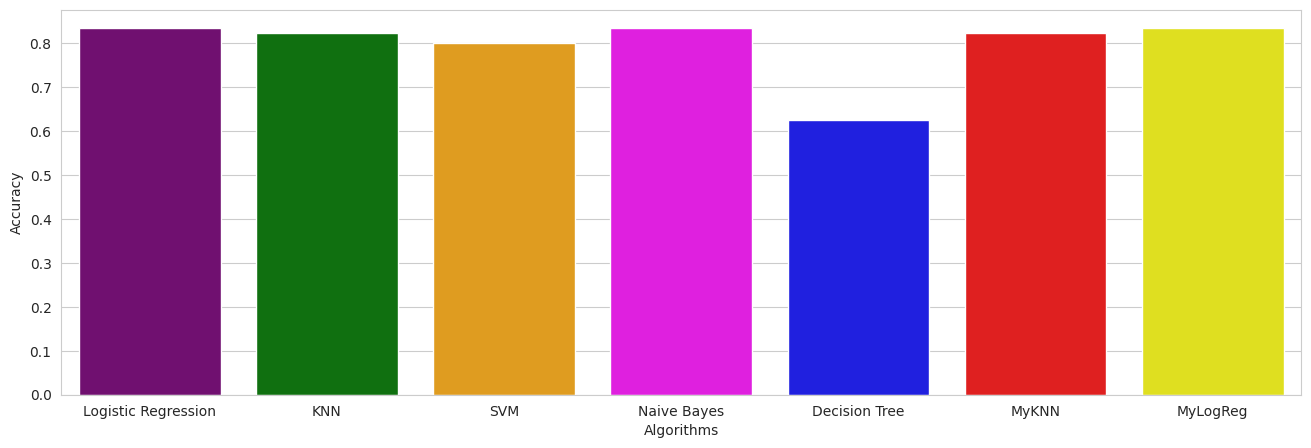

In [ ]:
colors = ["purple", "green", "orange", "magenta", "blue", "red", "yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

**Вывод:** для обученных моделей были подобраны гиперпараметры, путём использования GridSearchCV, где в качетсве метрик оценки качества модели выступала accuracy, auc, log_loss для KNN, NB, LogReg и только accuracy для MyKNN, MyLogReg, SVC, DecisionTree. Хуже всего себя показала модель DecisionTree с точностью 0.63. Остальные модели смогли перейти планку в 80% верных предсказаний. Лучше всего себя показали модели LogReg, NB и MyLogReg с точностью верных предсказаний >0.83

**Confusion matrix**


---



In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions
y_pred_logregr = log_clf.best_estimator_.predict(X_test)
y_pred_knn = knn_clf.best_estimator_.predict(X_test)
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)
y_pred_nb = nb_clf.best_estimator_.predict(X_test)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
y_pred_myknn = myknn_clf.best_estimator_.predict(X_test)
y_pred_mylogreg = mylog_clf.best_estimator_.predict(X_test)

# Confusion Matrices
# TP FP
# FN TN
cm_logregr = confusion_matrix(y_test, y_pred_logregr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_myknn = confusion_matrix(y_test, y_pred_myknn)
cm_mylogreg = confusion_matrix(y_test, y_pred_mylogreg)

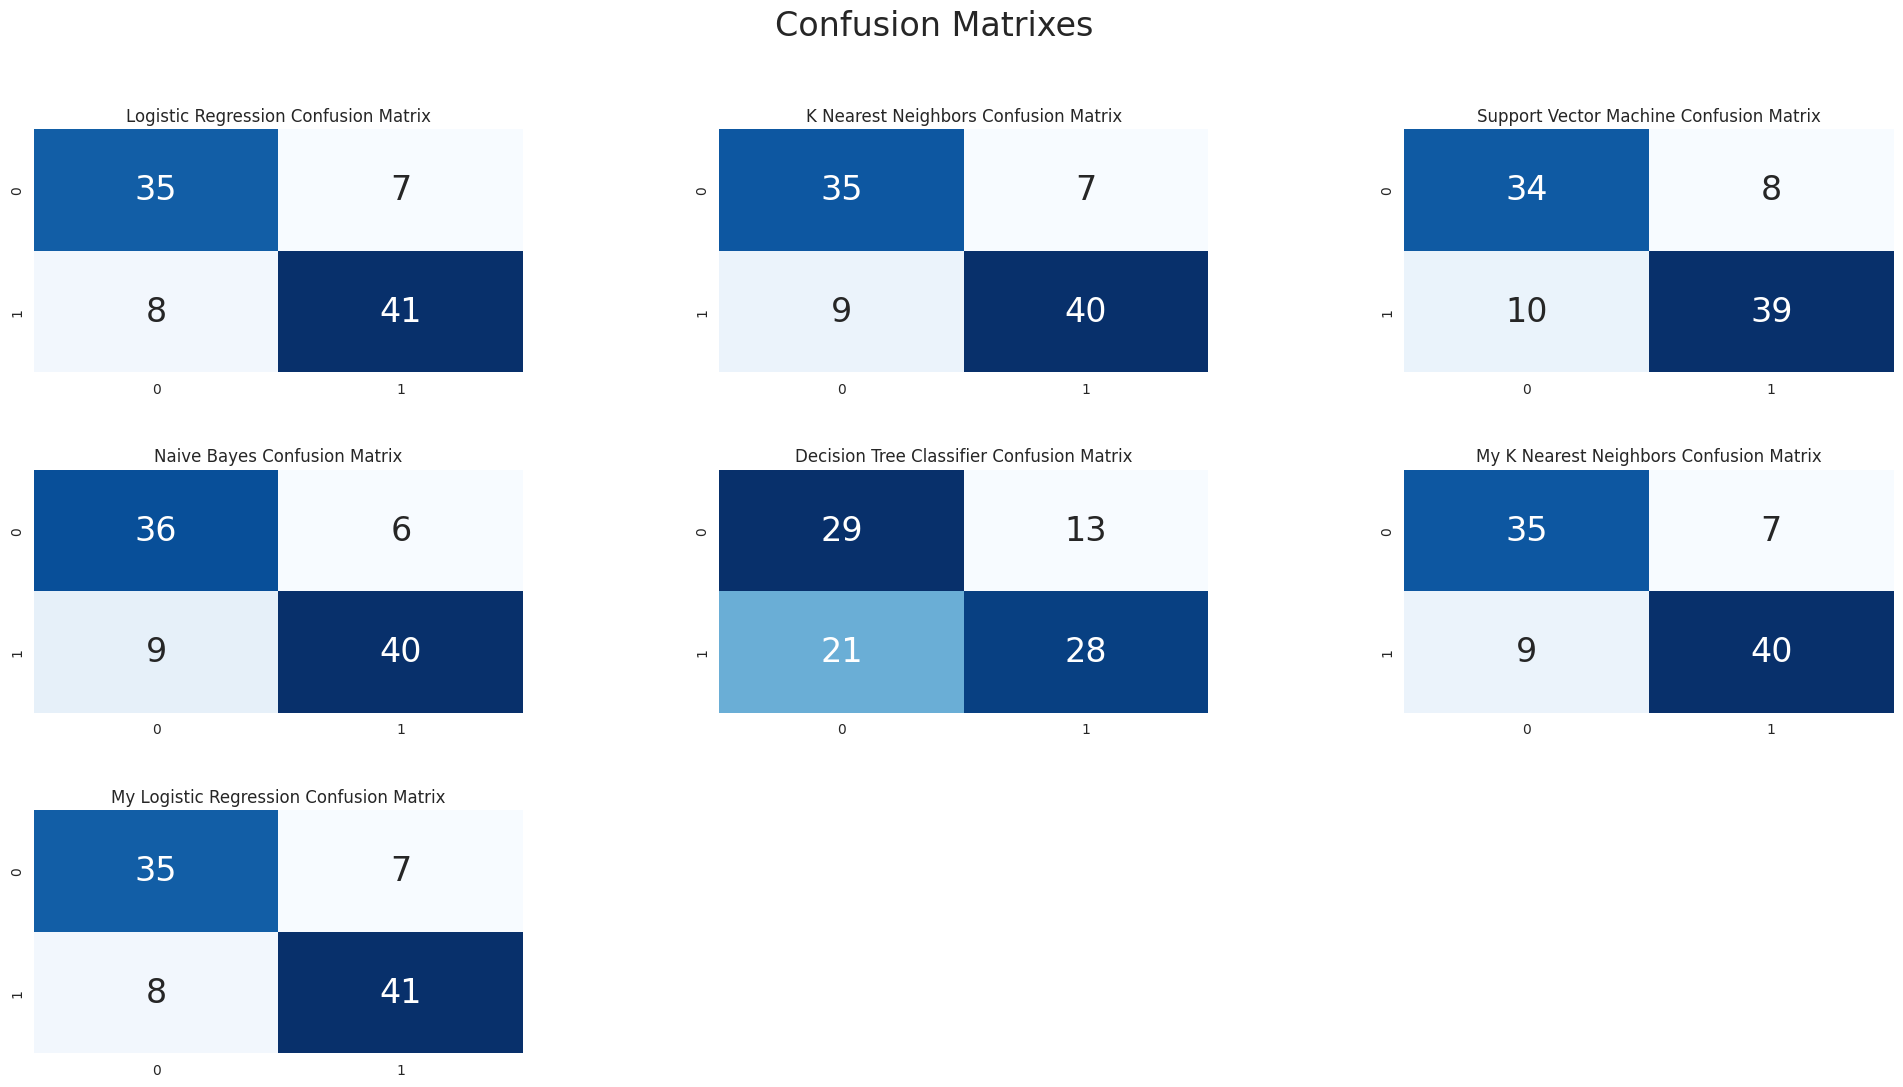

In [ ]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logregr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_myknn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("My Logistic Regression Confusion Matrix")
sns.heatmap(cm_mylogreg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

**Вывод:** для классификации стояла задача определить болен человек (целевой признак y) исходя из некоторой начальной поступающей информации о нём (нецелевые признаки X). Для нашей задачи критичными буду являться ошибки, когда человек болен, но модели определила его как здорового. Такие ошибки стоят дороже, чем те, когда модель ошибочно определила здорового человека, как больного.

Больше всего ошибок типа FN (False Negativ) у моделей: SVC, DecisionTree, KNN и MyKNN.
Оставшиеся 3 модели имеют одинаковое accuracy на тестовых данных, но NB имеет на одну критическую ошибку больше, чем модели LogReg и MyLogReg.

Модели логистической регрессии (LogReg - scikitlearn; MyLogReg - самореализованная) показали себя лучше для данной задачи.



---

Загрузим новый датасет с Kaggle и проведём для него разведочный анализ

In [ ]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



Для данного датасета интересно было бы предсказывать признак Personal Loan для бинарной классификации, где 0 - клиент не принял предложенный кредит и 1 - клиент принял предложение.

---


id - идентификатор клиента

age - возраст

experience - многолетний профессиональный опыт

income - годовой доход клиента

ZIP code - домашний индекс, почтовый индекс

Family - размер семьи клиента

CCAvg - средний расход по кредитным картам в месяц

Education - уровень образования (бакалавриат = 1, аспирантура - 2, продвинутый/профессиональный - 3)

Mortgage - стоимость ипотеки на дом, если таковая имеется

Personal Loan - принял ли этот клиент персональный кредит, предложенный в последней компании

Securities Account - есть ли у клиента счёт ценных бумаг в банке

CD Account - есть ли у клиента счёт депозитного сертификата в банке

Online - пользуется ли клиент услугами интернет банкинга

CreditCard - использует ли клиент кредитную карту, выпущенную UniversalBank


---

Предварительно удалим столбец ID так как он не несёт полезной информации для нашей задачи классификации, кроме нумерации строк, и также удалим столбец ZIP Code (почтовый индекс)

Проверим датасет на наличе пустых значений.

In [ ]:
df.drop(['ID','ZIP Code'], axis=1, inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
Securities Account,0
CD Account,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Датасет состоит из 5000 записей и не имеет ни одного пропущенного значения

In [ ]:
df['Personal Loan'].value_counts()

,count
Personal Loan,
0,4520
1,480


Датасет содержит слишком несбалансированные данные по целевому признаку. Поэтому при анализе качества работы моделей, больше внимания нужно будет уделять на ошибки FN (False Negativ), когда клиента определили как 0, хотя он 1. Потому что иначе, если взять даже самый глупый константный классификатор, то его точность будет достигать 4520/(4520+480) = 0.9

Также с точки зрения бизнеса, ошибки FN будут значить потерю прибыли

Посмотрим как фактор размера семьи влияет на таргетный признак взять кредит или нет

In [ ]:
df['Family'].value_counts()

,count
Family,
1,1472
2,1296
4,1222
3,1010


<Axes: xlabel='Family', ylabel='count'>

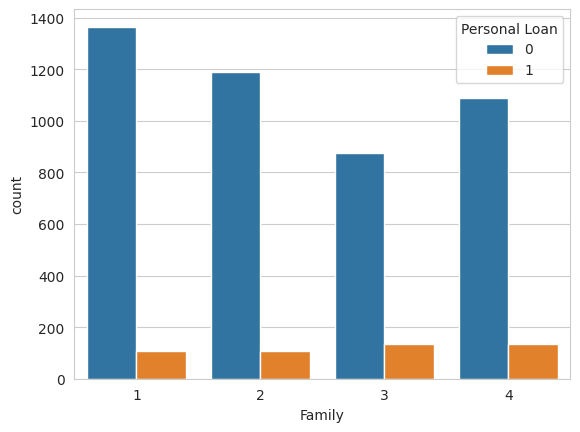

In [ ]:
sns.countplot(x ='Family', hue='Personal Loan', data=df)

Несмотря на то, что с ростом числа членов семьи клиентов сокращается число экземпляров выборки, число клиентов, которые взяли кредит сохраняется и даже немного растёт, это говорит о том, что признак размера семьи влияет на решение о взятии кредита. **Чем больше семья, тем больше шанс взять кредит**



---

Выдвенем предположение, что нецелевые признаки Age и Experience имеют высокую корреляцию.

In [ ]:
correlation = df['Age'].corr(df['Experience'])
correlation

0.9942148569683321

Предположение подвердилось, тогда исключим один из признаков.

In [ ]:
df.drop(['Experience'], axis=1, inplace=True)
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


<Axes: xlabel='Education', ylabel='count'>

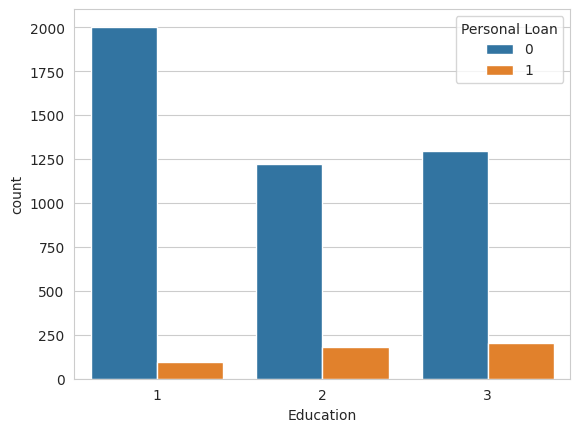

In [ ]:
sns.countplot(x ='Education', hue='Personal Loan', data=df)

Можно сделать вывод, что чем более образованный человек, тем больше шанс, что он возьмёт кредит

In [ ]:
df.groupby('Education')['Family'].mean()

,Family
Education,
1,2.236164
2,2.652174
3,2.381079


In [ ]:
df['Education'].value_counts()

,count
Education,
1,2096
3,1501
2,1403


Вывод: размер семьи не зависит от уровня образования


---

Посмотрим какой возраст чаще всего брал кредит



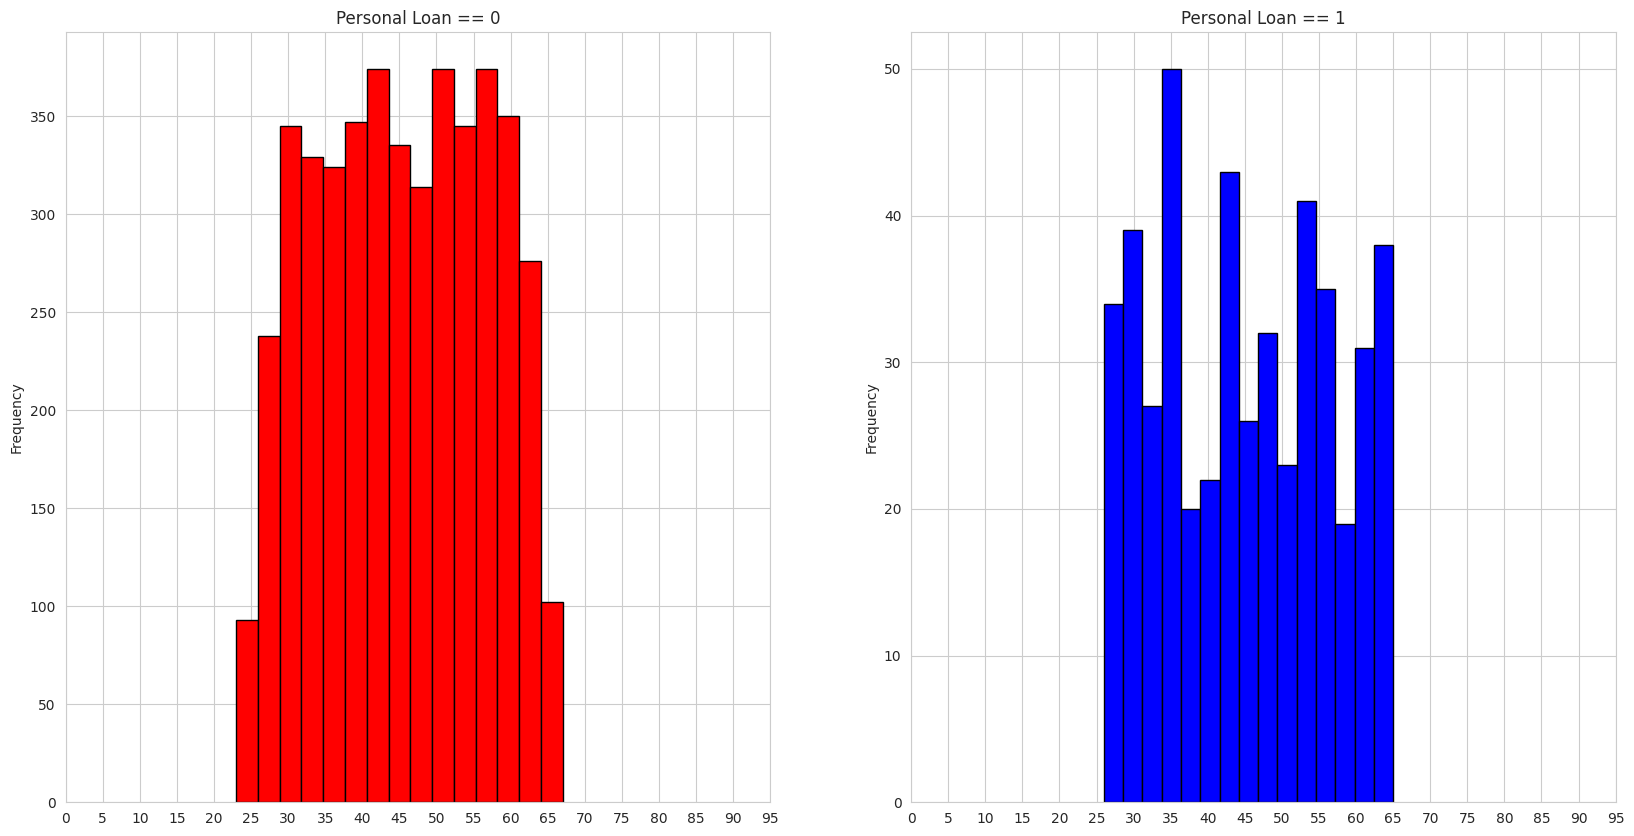

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(20, 10))
df[df['Personal Loan'] == 0]['Age'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('Personal Loan == 0')
x1 = list(range(0, 100, 5))
ax[0].set_xticks(x1)
df[df['Personal Loan'] == 1].Age.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('Personal Loan == 1')
x2 = list(range(0, 100, 5))
ax[1].set_xticks(x2)
plt.show()

По графику можно сделать выводы: относительно часто клиенты берут кредит в раннем (25 лет) и в пожилом возрасте (65 лет). Также существуют некоторые пики по возрасту когда клиенты соглашаются на кредиты чаще остального с переодичность в ~10 лет - это возраст 30, 35, 43, 53, 65.


---

Сделаем новый категориальный признак Income_cat

In [ ]:
df.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df['Income_cat'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['Income'] <= 35, 'Income_cat'] = 0  # далле разбиваем возраста на 4 категорий
df.loc[(df['Income'] > 35) & (df['Age'] <= 45), 'Income_cat'] = 1
df.loc[(df['Income'] > 45) & (df['Age'] <= 55), 'Income_cat'] = 2
df.loc[df['Income'] > 55, 'Income_cat'] = 3
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_cat
0,25,49,4,1.6,1,0,0,1,0,0,0,2
1,45,34,3,1.5,1,0,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0,3
4,35,45,4,1.0,2,0,0,0,0,0,1,1


<Axes: xlabel='Income_cat', ylabel='count'>

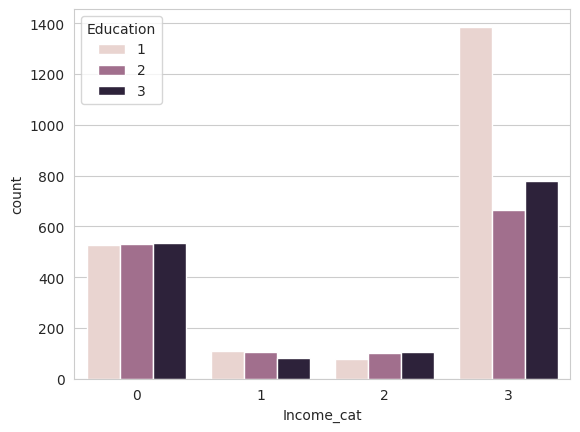

In [ ]:
sns.countplot(x ='Income_cat', hue='Education', data=df)

Вывод: самые успешные люди по доходу относятся к 1 категории образования, при том, что ранее было исследовано, что именно, чем выше степень образования, тем выше шанс взять кредит

<Axes: xlabel='Income_cat', ylabel='count'>

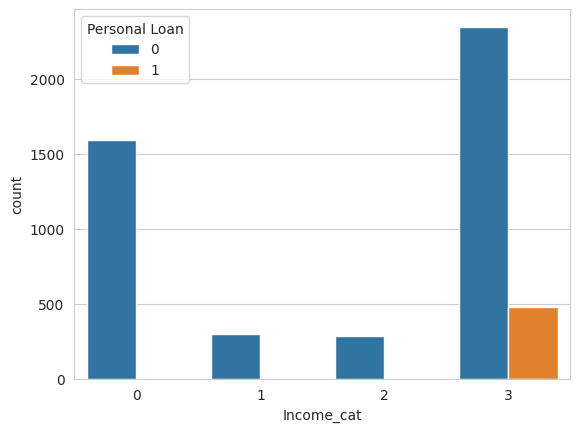

In [ ]:
sns.countplot(x ='Income_cat', hue='Personal Loan', data=df)

In [ ]:
df.groupby('Income_cat')['Personal Loan'].value_counts()

Income_cat  Personal Loan
0           0                1591
1           0                 297
2           0                 284
3           0                2348
            1                 480
Name: count, dtype: int64

Как оказалось, кредит берут клиенты только из категории высокого дохода, поэтому объединим первые 3 категории дохода в одну и получим, что признак Income_cat будет бинарным

In [ ]:
df.loc[df['Income_cat'] <= 2, 'Income_cat'] = 0
df.loc[df['Income_cat'] > 2, 'Income_cat'] = 1
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_cat
0,25,49,4,1.6,1,0,0,1,0,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0,1
4,35,45,4,1.0,2,0,0,0,0,0,1,0


In [ ]:
df.groupby('Income_cat')['Personal Loan'].value_counts()

Income_cat  Personal Loan
0           0                2172
1           0                2348
            1                 480
Name: count, dtype: int64

Построим матрицу корреляции

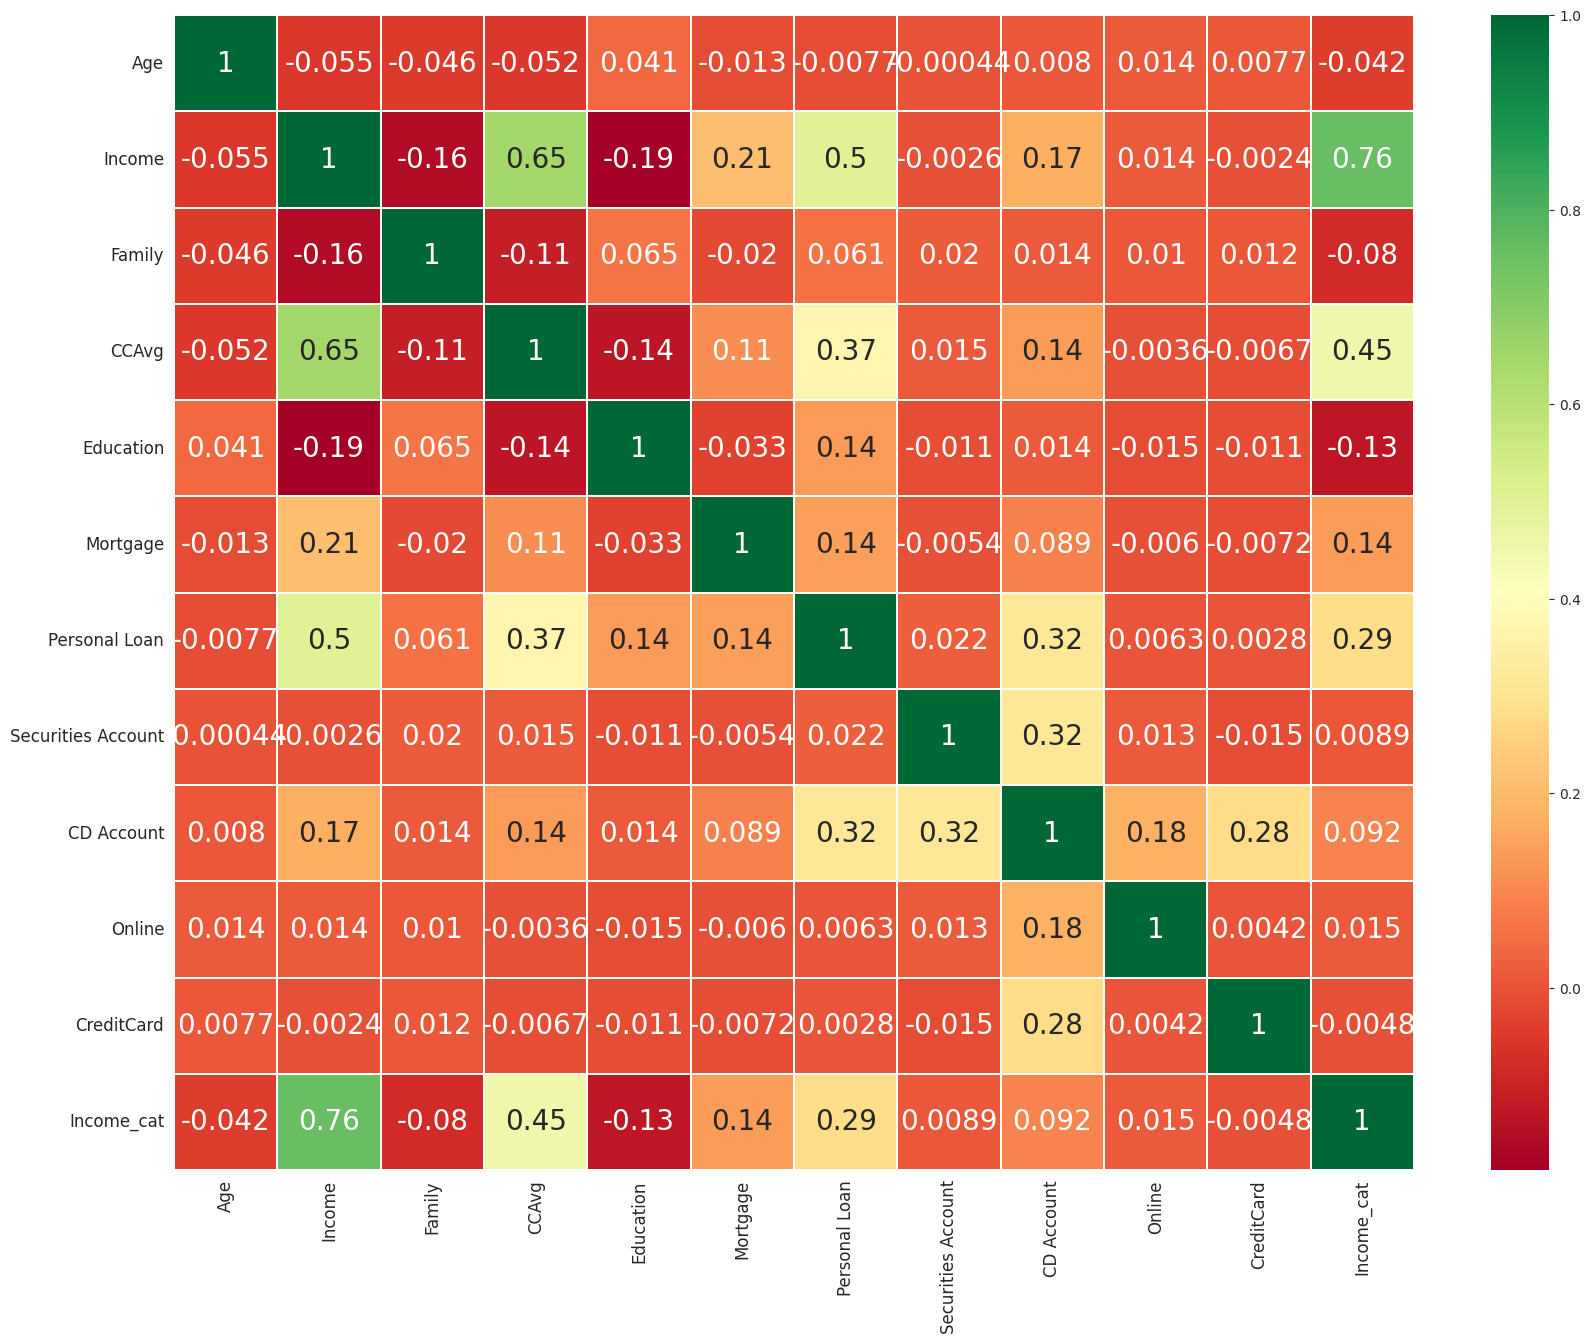

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наш созданный признак Income_cat коррелирует с целевым признаком меньше, чем количественный признак Income и при этом эти два нецелевых признака сильно коррелируют между собой, избавимся от ранее созданного признака и оставим Income

In [ ]:
df.drop(['Income_cat'], axis=1, inplace=True)
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**Начнём обучать модели на данном датасете и сохранять результаты для дальнейшего анализа и выбора лучшей модели для этой задачи и набора**


---



In [ ]:
y = df['Personal Loan']
X = df.drop(columns=['Personal Loan'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model_accuracies = {}

In [ ]:
C = np.arange(1e-05, 2, 0.1)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

log_reg = LogisticRegression(random_state=11)

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
model_accuracies['Logistic Regression'] = log_clf.score(X_test, y_test)
print("test score:", model_accuracies['Logistic Regression'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 LogisticRegression(C=1.4000100000000002, random_state=11))])
best params: {'clf__C': 1.4000100000000002}
best score: 0.9513142857142857
test score: 0.9526666666666667


In [ ]:
n_neighbors = np.arange(1, 11, 2)
weights = ['uniform', 'distance']

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

knn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
model_accuracies['KNN'] = knn_clf.score(X_test, y_test)
print("test score:", model_accuracies['KNN'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=1))])
best params: {'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
best score: 0.9602857142857143
test score: 0.956


In [ ]:
C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(5)

svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv,
        param_grid=dict(kernel=kernel,C=C, gamma=gamma),refit='Accuracy')

grid_svm.fit(X_train_scaled, y_train)

print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
model_accuracies['SVM'] = grid_svm.score(X_test_scaled, y_test)
print("test score:", model_accuracies['SVM'])

best score:  0.9757142857142856
best param:  {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
test score: 0.976


In [ ]:
priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(nb_clf.best_estimator_))
print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
model_accuracies['Naive Bayes'] = nb_clf.score(X_test, y_test)
print("test score:", model_accuracies['Naive Bayes'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', GaussianNB(var_smoothing=1.0))])
best params: {'clf__priors': None, 'clf__var_smoothing': 1.0}
best score: 0.9152000000000001
test score: 0.9166666666666666


In [ ]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
max_features = [2, 4, 6, 8]

cv = StratifiedKFold(5)

decision_tree = DecisionTreeClassifier(random_state=81)
grid_dt = GridSearchCV(estimator=decision_tree, cv=cv,
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features), refit='Accuracy')

grid_dt.fit(X_train, y_train)

print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
model_accuracies['Decision Tree'] = grid_dt.score(X_test, y_test)
print("test score:", model_accuracies['Decision Tree'])

best score:  0.9837142857142857
best param:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}
test score: 0.9853333333333333


In [ ]:
n_neighbors = np.arange(1, 11, 2)
weights = ['uniform', 'distance']
distances = ['euclidean', 'manhattan', 'chebyshev']

scoring = {'Accuracy': 'accuracy'}

myknn = MyKNN()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

myknn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',myknn)])

myknn_clf = GridSearchCV(estimator=myknn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights, clf__distances=distances), refit='Accuracy')

myknn_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(myknn_clf.best_estimator_))
print("best params: " + str(myknn_clf.best_params_))
print('best score:', myknn_clf.best_score_)
model_accuracies['MyKNN'] = myknn_clf.score(X_test, y_test)
print("test score:", model_accuracies['MyKNN'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', MyKNN(distances='manhattan', n_neighbors=1))])
best params: {'clf__distances': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
best score: 0.9614285714285713
test score: 0.9566666666666667


In [ ]:
C = np.arange(1e-05, 2, 0.1)
learning_rate = [0.1, 0.01, 0.001]
regularization = [None, 'l1', 'l2']

scoring = {'Accuracy': 'accuracy'}

mylog_reg = MyLogReg()

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

mylog_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',mylog_reg)])

mylog_clf = GridSearchCV(estimator=mylog_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C, clf__learning_rate=learning_rate, clf__regularization=regularization), refit='Accuracy')

mylog_clf.fit(X_train, y_train)

print('='*80)
print("best estimator: " + str(mylog_clf.best_estimator_))
print("best params: " + str(mylog_clf.best_params_))
print('best score:', mylog_clf.best_score_)
model_accuracies['MyLogReg'] = mylog_clf.score(X_test, y_test)
print("test score:", model_accuracies['MyLogReg'])
print('='*80)

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', MyLogReg(C=1e-05, learning_rate=0.1))])
best params: {'clf__C': 1e-05, 'clf__learning_rate': 0.1, 'clf__regularization': None}
best score: 0.9356
test score: 0.9406666666666667


**Сравниваем модели**


---



In [ ]:
model_accuracies

{'Logistic Regression': 0.9526666666666667,
 'KNN': 0.956,
 'SVM': 0.976,
 'Naive Bayes': 0.9166666666666666,
 'Decision Tree': 0.9853333333333333,
 'MyKNN': 0.9566666666666667,
 'MyLogReg': 0.9406666666666667}

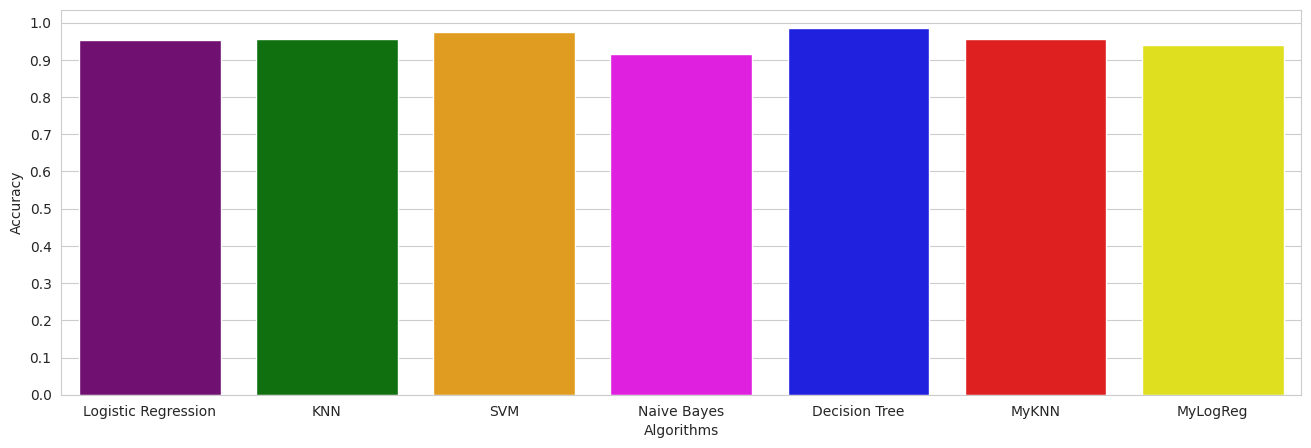

In [ ]:
colors = ["purple", "green", "orange", "magenta", "blue", "red", "yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

**Вывод:** как и ожидалось все модели перешли порог в 0.9 оценки точности. Самой слабой оказалась модель NB. Остальные модели примерно на одном уровне точности.

**Confusion Matrices**


---



In [ ]:
# Predictions
y_pred_logregr = log_clf.best_estimator_.predict(X_test)
y_pred_knn = knn_clf.best_estimator_.predict(X_test)
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)
y_pred_nb = nb_clf.best_estimator_.predict(X_test)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
y_pred_myknn = myknn_clf.best_estimator_.predict(X_test)
y_pred_mylogreg = mylog_clf.best_estimator_.predict(X_test)

# Confusion Matrices
# TP FP
# FN TN
cm_logregr = confusion_matrix(y_test, y_pred_logregr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_myknn = confusion_matrix(y_test, y_pred_myknn)
cm_mylogreg = confusion_matrix(y_test, y_pred_mylogreg)

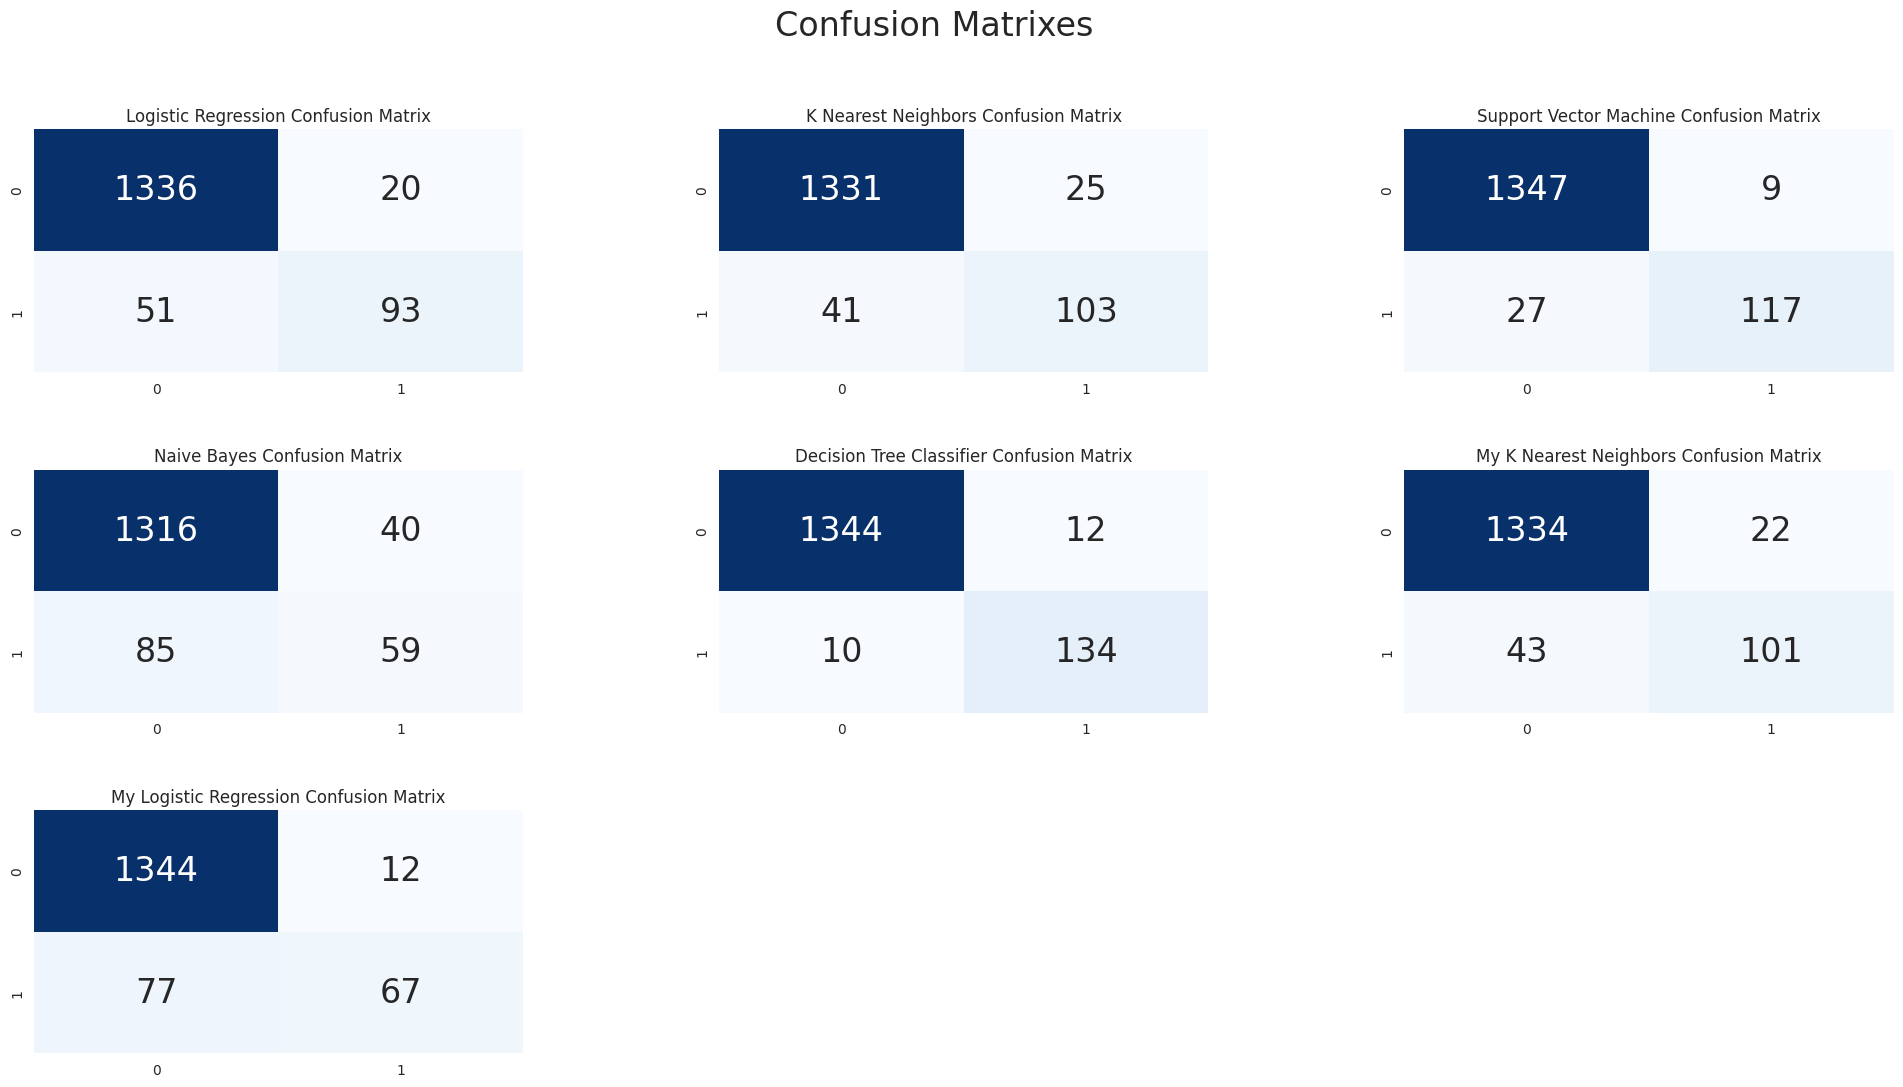

In [ ]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logregr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_myknn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("My Logistic Regression Confusion Matrix")
sns.heatmap(cm_mylogreg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

**Вывод:** для классификации стояла задача определить примет ли клиент предложение о кредите. Для нашей задачи, как для задачи бизнеса будут критичными ошибки FN, когда человек мог потенциально взять кредит 1, но модель разпознала его как 0

Больше всего ошибок типа FN (False Negativ) у моделей: MyLogReg и NB.

Модели DecisionTree и SVC показали себя лучше для данной задачи, потому что эти модели хорошо работают с несбалансированными классами.